# **Import Libraries**

In [1]:
!pip install tensorflow==2.18.1
!pip install mediapipe
!pip install neurite@git+https://github.com/adalca/neurite.git@40c6d0e277b12dc9dddb6e76f2dbdd373b7d22b1
!pip install voxelmorph@git+https://github.com/voxelmorph/voxelmorph.git@923a37d51b0c8d93eb576156c07ecb25c2a4e730


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 29.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 MB 12.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 16.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 6.1 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2

[notice] A new release of pip is available: 23.0.1 ->

In [2]:
import tensorflow as tf
import voxelmorph as vxm
import matplotlib.pyplot as plt
import numpy as np
import cv2
from zipfile import ZipFile
import os
import time

E0000 00:00:1754266013.510136      10 common_lib.cc:612] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: === 
learning/45eac/tfrc/runtime/common_lib.cc:230
/usr/local/lib/python3.10/site-packages/neurite/__init__.py:33: FutureWarning: The default backend will soon be changing to 'pytorch'. If you prefer to use TensorFlow, please set the NEURITE_BACKEND environment variable to 'tensorflow'.
  backend = py.utils.get_backend()


In [3]:
if len(tf.config.list_logical_devices('TPU')) > 0 :
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='local')
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
elif len(tf.config.list_logical_devices('GPU')) > 0 :
    gpus = tf.config.list_logical_devices('GPU')
    strategy = tf.distribute.MirroredStrategy(gpus)
else :
    pass

I0000 00:00:1754266033.578519      10 service.cc:148] XLA service 0x592462b71f80 initialized for platform TPU (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1754266033.578570      10 service.cc:156]   StreamExecutor device (0): TPU, 2a886c8
I0000 00:00:1754266033.578574      10 service.cc:156]   StreamExecutor device (1): TPU, 2a886c8
I0000 00:00:1754266033.578577      10 service.cc:156]   StreamExecutor device (2): TPU, 2a886c8
I0000 00:00:1754266033.578582      10 service.cc:156]   StreamExecutor device (3): TPU, 2a886c8
I0000 00:00:1754266033.578585      10 service.cc:156]   StreamExecutor device (4): TPU, 2a886c8
I0000 00:00:1754266033.578587      10 service.cc:156]   StreamExecutor device (5): TPU, 2a886c8
I0000 00:00:1754266033.578590      10 service.cc:156]   StreamExecutor device (6): TPU, 2a886c8
I0000 00:00:1754266033.578593      10 service.cc:156]   StreamExecutor device (7): TPU, 2a886c8


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local
INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


In [4]:
BATCH_SIZE = 8
IMAGE_SIZE = (256, 192)

# **Import Data**

In [6]:
train_agnostic_parse = tf.keras.utils.image_dataset_from_directory('/train/image-parse-agnostic-v3.2',
                                                                   labels=None,
                                                                   image_size=IMAGE_SIZE,
                                                                   batch_size=None,
                                                                   shuffle=False,
                                                                   subset='training',
                                                                   validation_split=0.12,
                                                                  )
val_agnostic_parse = tf.keras.utils.image_dataset_from_directory('/train/image-parse-agnostic-v3.2',
                                                                 labels=None,
                                                                 image_size=IMAGE_SIZE,
                                                                 batch_size=None,
                                                                 shuffle=False,
                                                                 subset='validation',
                                                                 validation_split=0.12,
                                                                )
test_agnostic_parse = tf.keras.utils.image_dataset_from_directory('/test/image-parse-agnostic-v3.2',
                                                                  labels=None,
                                                                  image_size=IMAGE_SIZE,
                                                                  batch_size=None,
                                                                  shuffle=False)

Found 11647 files.
Using 10250 files for training.
Found 11647 files.
Using 1397 files for validation.
Found 2032 files.


In [7]:
train_parse = tf.keras.utils.image_dataset_from_directory('/train/image-parse-v3',
                                                          labels=None,
                                                          image_size=IMAGE_SIZE,
                                                          batch_size=None,
                                                          shuffle=False,
                                                          subset='training',
                                                          validation_split=0.12,
                                                         )
val_parse = tf.keras.utils.image_dataset_from_directory('/train/image-parse-v3',
                                                        labels=None,
                                                        image_size=IMAGE_SIZE,
                                                        batch_size=None,
                                                        shuffle=False,
                                                        subset='validation',
                                                        validation_split=0.12,
                                                       )
test_parse = tf.keras.utils.image_dataset_from_directory('/test/image-parse-v3',
                                                         labels=None,
                                                         image_size=IMAGE_SIZE,
                                                         batch_size=None,
                                                         shuffle=False
                                                        )

Found 11647 files.
Using 10250 files for training.
Found 11647 files.
Using 1397 files for validation.
Found 2032 files.


In [8]:
train_images = tf.keras.utils.image_dataset_from_directory('/train/image',
                                                           labels=None,
                                                           image_size=IMAGE_SIZE,
                                                           batch_size=None,
                                                           shuffle=False,
                                                           subset='training',
                                                           validation_split=0.12,
                                                          ).map(lambda x: x / 255)
val_images = tf.keras.utils.image_dataset_from_directory('/train/image',
                                                         labels=None,
                                                         image_size=IMAGE_SIZE,
                                                         batch_size=None,
                                                         shuffle=False,
                                                         subset='validation',
                                                         validation_split=0.12,
                                                        ).map(lambda x: x / 255)
test_images = tf.keras.utils.image_dataset_from_directory('/test/image',
                                                          labels=None,
                                                          image_size=IMAGE_SIZE,
                                                          batch_size=None,
                                                          shuffle=False).map(lambda x: x / 255)

Found 11647 files.
Using 10250 files for training.
Found 11647 files.
Using 1397 files for validation.
Found 2032 files.


In [9]:
train_clothes = tf.keras.utils.image_dataset_from_directory('/train/cloth',
                                                            labels=None,
                                                            image_size=IMAGE_SIZE,
                                                            batch_size=None,
                                                            shuffle=False,
                                                            subset='training',
                                                            validation_split=0.12,
                                                           ).map(lambda x: x / 255)
val_clothes = tf.keras.utils.image_dataset_from_directory('/train/cloth',
                                                          labels=None,
                                                          image_size=IMAGE_SIZE,
                                                          batch_size=None,
                                                          shuffle=False,
                                                          subset='validation',
                                                          validation_split=0.12,
                                                         ).map(lambda x: x / 255)
test_clothes = tf.keras.utils.image_dataset_from_directory('/test/cloth',
                                                         labels=None,
                                                         image_size=IMAGE_SIZE,
                                                         batch_size=None,
                                                         shuffle=False).map(lambda x: x / 255)

train_clothes_mask = tf.keras.utils.image_dataset_from_directory('/train/cloth-mask',
                                                                 labels=None,
                                                                 image_size=IMAGE_SIZE,
                                                                 batch_size=None,
                                                                 shuffle=False,
                                                                 subset='training',
                                                                 validation_split=0.12,
                                                                )
val_clothes_mask = tf.keras.utils.image_dataset_from_directory('/train/cloth-mask',
                                                               labels=None,
                                                               image_size=IMAGE_SIZE,
                                                               batch_size=None,
                                                               shuffle=False,
                                                               subset='validation',
                                                               validation_split=0.12,
                                                              )
test_clothes_mask = tf.keras.utils.image_dataset_from_directory('/test/cloth-mask',
                                                               labels=None,
                                                               image_size=IMAGE_SIZE,
                                                               batch_size=None,
                                                               shuffle=False)

Found 11647 files.
Using 10250 files for training.
Found 11647 files.
Using 1397 files for validation.
Found 2032 files.
Found 11647 files.
Using 10250 files for training.
Found 11647 files.
Using 1397 files for validation.
Found 2032 files.


# **Data Preprocessing**

## Clothes Mask

In [10]:
def threshold_clothes_mask(image) :
    image = tf.reduce_mean(image, axis=-1)
    mask = tf.where(image > 127, 1.0, 0.0)
    mask = tf.expand_dims(mask, axis=-1)
    return mask

In [11]:
train_clothes_mask = train_clothes_mask.map(threshold_clothes_mask)
val_clothes_mask = val_clothes_mask.map(threshold_clothes_mask)
test_clothes_mask = test_clothes_mask.map(threshold_clothes_mask)

## Extract Clothes from Person

In [12]:
def extract_clothes(image, mask) :
    cloth_mask = tf.reduce_all(tf.equal(mask,
                                        tf.constant([254, 85, 0], dtype=tf.float32)),
                               axis=-1)
    dress_mask = tf.reduce_all(tf.equal(mask,
                                        tf.constant([0, 0, 85], dtype=tf.float32)),
                               axis=-1)
    coat_mask = tf.reduce_all(tf.equal(mask,
                                        tf.constant([0, 119, 220], dtype=tf.float32)),
                               axis=-1)
    cloth_mask_inv = tf.cast(tf.expand_dims(tf.logical_not(cloth_mask), axis=-1), tf.float32)
    dress_mask_inv = tf.cast(tf.expand_dims(tf.logical_not(dress_mask), axis=-1), tf.float32)
    coat_mask_inv = tf.cast(tf.expand_dims(tf.logical_not(coat_mask), axis=-1), tf.float32)
    background = (cloth_mask_inv * dress_mask_inv * coat_mask_inv) * (246 / 255)

    cloth_mask = tf.cast(tf.expand_dims(cloth_mask, axis=-1), tf.float32)
    dress_mask = tf.cast(tf.expand_dims(dress_mask, axis=-1), tf.float32)
    coat_mask = tf.cast(tf.expand_dims(coat_mask, axis=-1), tf.float32)
    mask = cloth_mask + dress_mask + coat_mask

    masked_image = tf.multiply(image, mask) + background
    return masked_image

In [13]:
train_warped_clothes = tf.data.Dataset.zip(train_images, train_parse).map(lambda x, y: extract_clothes(x, y))
val_warped_clothes = tf.data.Dataset.zip(val_images, val_parse).map(lambda x, y: extract_clothes(x, y))
test_warped_clothes = tf.data.Dataset.zip(test_images, test_parse).map(lambda x, y: extract_clothes(x, y))

## Create Pose Skeleton from MediaPipe

In [14]:
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

In [14]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(image_size, detection_result, image=None):
    pose_landmarks_list = detection_result.pose_landmarks
    if image is None :
        canvas = np.zeros(image_size)
    else :
        canvas = np.copy(image)

    # Loop through the detected poses to visualize.
    for idx in range(len(pose_landmarks_list)):
        pose_landmarks = pose_landmarks_list[idx]

        # Draw the pose landmarks.
        pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
        pose_landmarks_proto.landmark.extend([
          landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
        ])
        solutions.drawing_utils.draw_landmarks(
          canvas,
          pose_landmarks_proto,
          solutions.pose.POSE_CONNECTIONS,
          solutions.drawing_styles.get_default_pose_landmarks_style())
    return canvas

In [15]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options
)
detector = vision.PoseLandmarker.create_from_options(options)

I0000 00:00:1754266254.891006      10 task_runner.cc:85] GPU suport is not available: INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:77) display != EGL_NO_DISPLAYeglGetDisplay() returned error 0x300c
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1754266254.989273    3137 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1754266255.159141    3137 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [16]:
def apply_mediapipe(tensor) :
    def process(input_) :
        input_int = (input_.numpy() * 255).astype(np.uint8)
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=input_int)
        detection_result = detector.detect(mp_image)
        landmark = draw_landmarks_on_image(input_int.shape, detection_result)
        landmark = np.expand_dims(np.mean(landmark, axis=-1), axis=-1)
        return np.array(landmark, dtype=np.float32) / 255
    return tf.py_function(process, [tensor], tf.float32)

In [17]:
train_landmark = train_images.map(apply_mediapipe).map(lambda x: tf.ensure_shape(x, [*IMAGE_SIZE, 1]))
val_landmark = val_images.map(apply_mediapipe).map(lambda x: tf.ensure_shape(x, [*IMAGE_SIZE, 1]))
test_landmark = test_images.map(apply_mediapipe).map(lambda x: tf.ensure_shape(x, [*IMAGE_SIZE, 1]))

## Combine (Multiply) Person Images and the Agnostic Parse

In [18]:
def filter_clothes(image, mask) :
    mask = tf.reduce_all(tf.equal(mask, tf.constant([0, 0, 0], dtype=tf.float32)), axis=-1)
    mask = tf.cast(tf.expand_dims(tf.logical_not(mask), axis=-1), tf.float32)
    image_masked = tf.multiply(image, mask)
    return image_masked

In [19]:
train_images_agnostic = tf.data.Dataset.zip(train_images, train_agnostic_parse).map(lambda x, y: filter_clothes(x, y))
val_images_agnostic = tf.data.Dataset.zip(val_images, val_agnostic_parse).map(lambda x, y: filter_clothes(x, y))
test_images_agnostic = tf.data.Dataset.zip(test_images, test_agnostic_parse).map(lambda x, y: filter_clothes(x, y))

## Zip All Inputs and the Images

In [20]:
train_datasets = tf.data.Dataset.zip(tf.data.Dataset.zip(train_images_agnostic,
                                                         train_landmark,
                                                         train_clothes,
                                                         train_clothes_mask),
                                     tf.data.Dataset.zip(train_warped_clothes, train_images)
                                    ).cache().shuffle(BATCH_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
train_dist_data = strategy.experimental_distribute_dataset(train_datasets)

val_datasets = tf.data.Dataset.zip(tf.data.Dataset.zip(val_images_agnostic,
                                                       val_landmark,
                                                       val_clothes,
                                                       val_clothes_mask),
                                   tf.data.Dataset.zip(val_warped_clothes, val_images)
                                  ).cache().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_dist_data = strategy.experimental_distribute_dataset(val_datasets)

test_datasets = tf.data.Dataset.zip(tf.data.Dataset.zip(test_images_agnostic,
                                                        test_landmark,
                                                        test_clothes,
                                                        test_clothes_mask),
                                    tf.data.Dataset.zip(test_warped_clothes, test_images)
                                   ).cache().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dist_data = strategy.experimental_distribute_dataset(test_datasets)

# **Modelling**

In [21]:
def UNet(input_shape,
         inputs=None,
         initial_filter=64,
         min_latent_dim=4,
         output_channel=3,
         output_activation='relu',
         encoder_conv_num=1,
         bottleneck_conv_num=3,
         bottleneck_filter_num=512,
         decoder_conv_num=1,
         use_upsample=True,
         use_pooling=True,
         use_instance_norm=False,
         use_leaky_relu=False,
         show_summary=True,
         model_name="attention_unet"
        ) :
    block_outputs = []
    block_filters = []
    min_dim = min(input_shape[:2])

    if inputs is None :
        input_layer = tf.keras.Input(shape=input_shape)
    else :
        input_layer = tf.keras.layers.Concatenate(name='concat_inputs')(inputs)

    # Encoder
    counter = 0
    factor = 1
    prev_layer = input_layer

    while min_dim >= min_latent_dim :
        if len(block_outputs) > 0 :
            if use_pooling :
                downsample = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(block_outputs[-1])
            else :
                downsample = tf.keras.layers.Conv2D(filters=initial_filter*factor,
                                                 kernel_size=(3, 3),
                                                 strides=2,
                                                 padding='same')(block_outputs[-1])
            prev_layer = downsample

        if counter == 2 :
            factor *= 2
            counter = 0

        for i in range(encoder_conv_num) :
            conv = tf.keras.layers.Conv2D(filters=initial_filter*factor,
                                       kernel_size=(3, 3),
                                       padding='same')(prev_layer)
            if not use_instance_norm :
                norm = tf.keras.layers.BatchNormalization()(conv)
            else :
                norm = tf.keras.layers.GroupNormalization(groups=-1)(conv)

            if not use_leaky_relu :
                relu = tf.keras.layers.ReLU()(norm)
            else :
                relu = tf.keras.layers.LeakyReLU()(norm)
            prev_layer = relu

        block_outputs.append(relu)
        block_filters.append(initial_filter*factor)

        counter += 1
        if min_dim % 2 == 0 :
            min_dim /= 2
        else :
            break

    # Bottleneck
    for _ in range(bottleneck_conv_num) :

        conv = tf.keras.layers.Conv2D(filters=bottleneck_filter_num,
                                   kernel_size=(3, 3),
                                   padding='same')(prev_layer)
        if not use_instance_norm :
            norm = tf.keras.layers.BatchNormalization()(conv)
        else :
            norm = tf.keras.layers.GroupNormalization(groups=-1)(conv)

        if not use_leaky_relu :
            relu = tf.keras.layers.ReLU()(norm)
        else :
            relu = tf.keras.layers.LeakyReLU()(norm)
        prev_layer = relu

    # Decoder
    output_idx = len(block_outputs) - 1
    counter = 0
    if factor > 1 :
        factor /= 2

    while output_idx > 0 :
        if not use_upsample :
            upsize_layer = tf.keras.layers.Conv2DTranspose(filters=block_filters[output_idx-1],
                                                        kernel_size=(2, 2),
                                                        strides=2)(prev_layer)
        else :
            upsize_layer = tf.keras.layers.UpSampling2D(size=(2, 2), interpolation='bilinear')(prev_layer)

        if not use_instance_norm :
            norm = tf.keras.layers.BatchNormalization()(upsize_layer)
        else :
            norm = tf.keras.layers.GroupNormalization(groups=-1)(upsize_layer)

        if not use_leaky_relu :
            relu = tf.keras.layers.ReLU()(norm)
        else :
            relu = tf.keras.layers.LeakyReLU()(norm)

        # Attention block
        conv_w_encoder = tf.keras.layers.Conv2D(filters=block_filters[output_idx-1],
                                               kernel_size=(1, 1),
                                               padding='same')(block_outputs[output_idx-1])
        if not use_instance_norm :
            norm_w_encoder = tf.keras.layers.BatchNormalization()(conv_w_encoder)
        else :
            norm_w_encoder = tf.keras.layers.GroupNormalization(groups=-1)(conv_w_encoder)

        conv_w_decoder = tf.keras.layers.Conv2D(filters=block_filters[output_idx-1],
                                               kernel_size=(1, 1),
                                               padding='same')(relu)

        if not use_instance_norm :
            norm_w_decoder = tf.keras.layers.BatchNormalization()(conv_w_decoder)
        else :
            norm_w_decoder = tf.keras.layers.GroupNormalization(groups=-1)(conv_w_decoder)

        w_add = tf.keras.layers.Add()([norm_w_encoder, norm_w_decoder])

        if not use_leaky_relu :
            w_relu = tf.keras.layers.ReLU()(w_add)
        else :
            w_relu = tf.keras.layers.LeakyReLU()(w_add)

        w_output = tf.keras.layers.Conv2D(filters=block_filters[output_idx-1],
                                       kernel_size=(1, 1),
                                       padding='same',
                                       activation='sigmoid')(w_relu)
        att_output = tf.keras.layers.Multiply()([w_output, block_outputs[output_idx-1]])

        # Concatenate
        concat = tf.keras.layers.Concatenate()([relu, att_output])
        prev_layer = concat

        for _ in range(decoder_conv_num) :
            conv = tf.keras.layers.Conv2D(filters=block_filters[output_idx-1],
                                       kernel_size=(3, 3),
                                       padding='same')(prev_layer)
            if not use_instance_norm :
                norm = tf.keras.layers.BatchNormalization()(conv)
            else :
                norm = tf.keras.layers.GroupNormalization(groups=-1)(conv)

            if not use_leaky_relu :
                relu = tf.keras.layers.ReLU()(norm)
            else :
                relu = tf.keras.layers.LeakyReLU()(norm)
            prev_layer = relu

        output_idx -= 1

    output = tf.keras.layers.Conv2D(filters=output_channel,
                                 kernel_size=(1, 1),
                                 activation=output_activation,
                                 padding='same')(prev_layer)

    if inputs is None :
        model = tf.keras.Model(inputs=input_layer, outputs=output, name=model_name)
    else :
        model = tf.keras.Model(inputs=inputs, outputs=output, name=model_name)

    if show_summary :
        model.summary()

    return model

## Define Losses

In [22]:
def load_vgg19() :
    vgg19 = tf.keras.applications.VGG19(weights='imagenet',
                                        input_shape=(*IMAGE_SIZE, 3),
                                        include_top=False)
    vgg19 = tf.keras.models.Model(inputs=vgg19.input,
                                  outputs=vgg19.get_layer('block4_conv4').output)
    vgg19.trainable = False
    return vgg19

In [23]:
def load_losses_object() :
    mse_loss = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)
    mae_loss = tf.keras.losses.MeanAbsoluteError(reduction=tf.keras.losses.Reduction.NONE)
    grad_loss = vxm.losses.Grad('l2').loss

    return mse_loss, mae_loss, grad_loss

In [24]:
with strategy.scope() :
    vgg19 = load_vgg19()
    mse, l1, grad = load_losses_object()

I0000 00:00:1754266255.777943      10 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [25]:
def compute_vgg_loss(real_images, fake_images) :
    real_images = tf.keras.applications.vgg19.preprocess_input(tf.cast(real_images, dtype=tf.float32) * 255.0)
    fake_images = tf.keras.applications.vgg19.preprocess_input(tf.cast(fake_images, dtype=tf.float32) * 255.0)
    vgg_real = vgg19(real_images, training=False)
    vgg_fake = vgg19(fake_images, training=False)

    per_example_vgg_loss = l1(vgg_real, vgg_fake)
    per_example_vgg_loss /= tf.cast(tf.reduce_prod(tf.shape(per_example_vgg_loss)[1:]), tf.float32)
    vgg_loss = tf.nn.compute_average_loss(per_example_vgg_loss)

    return vgg_loss

In [26]:
def compute_l1_loss(real_images, fake_images) :
    per_example_l1_loss = l1(real_images, fake_images)
    per_example_l1_loss /= tf.cast(tf.reduce_prod(tf.shape(per_example_l1_loss)[1:]), tf.float32)
    l1_loss = tf.nn.compute_average_loss(per_example_l1_loss)

    return l1_loss

In [27]:
def compute_grad_loss(flow) :
    per_example_grad_loss = grad(_, flow)
    grad_loss = tf.nn.compute_average_loss(per_example_grad_loss)
    return grad_loss

# **Training**

In [32]:
with strategy.scope() :
    person_agnostic_input = tf.keras.Input(shape=(*IMAGE_SIZE, 3))
    skeleton_input = tf.keras.Input(shape=(*IMAGE_SIZE, 1))
    cloth_input = tf.keras.Input(shape=(*IMAGE_SIZE, 3))
    cloth_mask_input = tf.keras.Input(shape=(*IMAGE_SIZE, 1))
    concat_inputs = [person_agnostic_input, skeleton_input, cloth_input, cloth_mask_input]
    
    warp_input_channels = sum([input.shape[-1] for input in concat_inputs])
    warp_unet = UNet(input_shape=(*IMAGE_SIZE, warp_input_channels),
                     inputs=concat_inputs,
                     initial_filter=64,
                     min_latent_dim=2,
                     output_channel=2,
                     output_activation='linear',
                     encoder_conv_num=3,
                     bottleneck_conv_num=3,
                     decoder_conv_num=3,
                     use_pooling=False,
                     use_instance_norm=True,
                     use_leaky_relu=True,
                     show_summary=False,
                     )

    spatial_transformer = vxm.layers.SpatialTransformer()([cloth_input, warp_unet.output])
    warp_model = tf.keras.Model(inputs=concat_inputs,
                                outputs=[person_agnostic_input, skeleton_input, spatial_transformer],
                                name='warp_model')

In [33]:
with strategy.scope() :
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

## Training Warp Model

In [36]:
def warp_train_step(inputs, real_images) :
    with tf.GradientTape() as tape :
        flow = warp_unet(inputs, training=True)
        _, _, warp_images = warp_model(inputs, training=True)

        l1_loss = compute_l1_loss(real_images, warp_images)
        grad_loss = compute_grad_loss(flow)
        vgg_loss = compute_vgg_loss(real_images, warp_images)

        total_loss = 0.5 * grad_loss + 20 * l1_loss + 0.1 * vgg_loss

    warp_gradients = tape.gradient(total_loss, warp_model.trainable_variables)
    optimizer.apply_gradients(zip(warp_gradients, warp_model.trainable_variables))

    return total_loss, vgg_loss, l1_loss, grad_loss

@tf.function
def distributed_warp_train_step(inputs, real_images):
    losses = strategy.run(warp_train_step, args=(inputs, real_images))
    per_replica_total_loss, per_replica_vgg_loss, per_replica_l1_loss, per_replica_grad_loss = losses

    total_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_total_loss, axis=None)
    vgg_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_vgg_loss, axis=None)
    l1_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_l1_loss, axis=None)
    grad_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_grad_loss, axis=None)

    return total_loss, vgg_loss, l1_loss, grad_loss

In [36]:
def warp_val_step(inputs, real_images) :
    flow = warp_unet(inputs, training=False)
    _, _, warp_images = warp_model(inputs, training=False)

    val_l1_loss = compute_l1_loss(real_images, warp_images)
    val_grad_loss = compute_grad_loss(flow)
    val_vgg_loss = compute_vgg_loss(real_images, warp_images)

    val_total_loss = 0.5 * val_grad_loss + 20 * val_l1_loss + 0.1 * val_vgg_loss

    return val_total_loss, val_vgg_loss, val_l1_loss, val_grad_loss

@tf.function
def distributed_warp_val_step(inputs, real_images):
    val_losses = strategy.run(warp_val_step, args=(inputs, real_images))

    val_per_replica_total_loss, val_per_replica_vgg_loss, val_per_replica_l1_loss, val_per_replica_grad_loss = val_losses

    val_total_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, val_per_replica_total_loss, axis=None)
    val_vgg_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, val_per_replica_vgg_loss, axis=None)
    val_l1_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, val_per_replica_l1_loss, axis=None)
    val_grad_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, val_per_replica_grad_loss, axis=None)

    return val_total_loss, val_vgg_loss, val_l1_loss, val_grad_loss

In [ ]:
EPOCHS = 50
PREVIOUS_EPOCH = 0
best_val_total_loss = 0

for epoch in range(PREVIOUS_EPOCH+1, EPOCHS+PREVIOUS_EPOCH+1) :
    start = time.time()

    total_loss, vgg_loss, l1_loss, grad_loss = 0, 0, 0, 0
    val_total_loss, val_vgg_loss, val_l1_loss, val_grad_loss = 0, 0, 0, 0
    val_num_batches = 0
    train_num_batches = 0

    # Training step
    for inputs, real_images in train_dist_data :
        step_total_loss, step_vgg_loss, step_l1_loss, step_grad_loss = distributed_warp_train_step(inputs, real_images[0])

        total_loss += step_total_loss
        vgg_loss += step_vgg_loss
        l1_loss += step_l1_loss
        grad_loss += step_grad_loss

        train_num_batches += 1

    # Validation
    for val_inputs, val_real_images in val_dist_data :
        step_val_total_loss, step_val_vgg_loss, step_val_l1_loss, step_val_grad_loss = distributed_warp_val_step(val_inputs, val_real_images[0])

        val_total_loss += step_val_total_loss
        val_vgg_loss += step_val_vgg_loss
        val_l1_loss += step_val_l1_loss
        val_grad_loss += step_val_grad_loss

        val_num_batches += 1

    mean_total_loss = total_loss / train_num_batches
    mean_vgg_loss = vgg_loss / train_num_batches
    mean_l1_loss = l1_loss / train_num_batches
    mean_grad_loss = grad_loss / train_num_batches

    mean_val_total_loss = val_total_loss / val_num_batches
    mean_val_vgg_loss = val_vgg_loss / val_num_batches
    mean_val_l1_loss = val_l1_loss / val_num_batches
    mean_val_grad_loss = val_grad_loss / val_num_batches

    if (mean_val_total_loss < best_val_total_loss) or (epoch == 1) :
        best_val_total_loss = mean_val_total_loss
        warp_model.save_weights('warp_model_best.weights.h5')

    warp_model.save_weights('warp_model_checkpoint.weights.h5')

    print(f"Epoch {epoch}")
    print(f"Training Loss : {mean_total_loss: .2f} | \
    Training Perceptual Loss : {mean_vgg_loss: .2f} | Training MAE : {mean_l1_loss: .2f} | \
    Training Grad Loss : {mean_grad_loss: .2f}")
    print(f"Validation Loss : {mean_val_total_loss: .2f} | \
    Validation Perceptual Loss : {mean_val_vgg_loss: .2f} | Validation MAE : {mean_val_l1_loss: .2f} | \
    Validation Grad Loss : {mean_val_grad_loss: .2f}")
    print(f"Time taken : {time.time() - start: .2f} s")
    print("-"*28)

W0000 00:00:1754013192.289983    3078 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
I0000 00:00:1754013291.973165      10 encapsulate_tpu_computations_pass.cc:266] Subgraph fingerprint:949286155253242813
E0000 00:00:1754013294.752481      10 meta_optimizer.cc:966] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Add_4/ReadVariableOp.
I0000 00:00:1754013298.636758    1077 tpu_compilation_cache_interface.cc:442] TPU host compilation cache miss: cache_key(9814260238086594416), session_name()
I0000 00:00:1754013350.114465    1077 tpu_compile_op_common.cc:245] Compilation of 9814260238086594416 with session name  took 51.477660296s and succeeded
I0000 00:00:1754013350.249033    1077 tpu_compilation_cache_interface.cc:476] TPU host compilation cache: compilation complete for cache_key(9814260238086594416), session_name(), subgraph_key(std::stri

Epoch 1
Training Loss :  4.42 |     Training Perceptual Loss :  28.92 | Training MAE :  0.07 |     Training Grad Loss :  0.31
Validation Loss :  4.10 |     Validation Perceptual Loss :  27.26 | Validation MAE :  0.06 |     Validation Grad Loss :  0.42
Time taken :  1411.64 s
----------------------------
Epoch 2
Training Loss :  3.56 |     Training Perceptual Loss :  24.33 | Training MAE :  0.05 |     Training Grad Loss :  0.41
Validation Loss :  3.50 |     Validation Perceptual Loss :  24.01 | Validation MAE :  0.05 |     Validation Grad Loss :  0.38
Time taken :  265.66 s
----------------------------
Epoch 3
Training Loss :  3.23 |     Training Perceptual Loss :  22.28 | Training MAE :  0.04 |     Training Grad Loss :  0.42
Validation Loss :  3.27 |     Validation Perceptual Loss :  22.59 | Validation MAE :  0.04 |     Validation Grad Loss :  0.39
Time taken :  266.21 s
----------------------------
Epoch 4
Training Loss :  3.03 |     Training Perceptual Loss :  21.08 | Training MAE : 

In [ ]:
EPOCHS = 50
PREVIOUS_EPOCH = 50

for epoch in range(PREVIOUS_EPOCH+1, EPOCHS+PREVIOUS_EPOCH+1) :
    start = time.time()

    total_loss, vgg_loss, l1_loss, grad_loss = 0, 0, 0, 0
    val_total_loss, val_vgg_loss, val_l1_loss, val_grad_loss = 0, 0, 0, 0
    val_num_batches = 0
    train_num_batches = 0

    # Training step
    for inputs, real_images in train_dist_data :
        step_total_loss, step_vgg_loss, step_l1_loss, step_grad_loss = distributed_warp_train_step(inputs, real_images[0])

        total_loss += step_total_loss
        vgg_loss += step_vgg_loss
        l1_loss += step_l1_loss
        grad_loss += step_grad_loss

        train_num_batches += 1

    # Validation
    for val_inputs, val_real_images in val_dist_data :
        step_val_total_loss, step_val_vgg_loss, step_val_l1_loss, step_val_grad_loss = distributed_warp_val_step(val_inputs, val_real_images[0])

        val_total_loss += step_val_total_loss
        val_vgg_loss += step_val_vgg_loss
        val_l1_loss += step_val_l1_loss
        val_grad_loss += step_val_grad_loss

        val_num_batches += 1

    mean_total_loss = total_loss / train_num_batches
    mean_vgg_loss = vgg_loss / train_num_batches
    mean_l1_loss = l1_loss / train_num_batches
    mean_grad_loss = grad_loss / train_num_batches

    mean_val_total_loss = val_total_loss / val_num_batches
    mean_val_vgg_loss = val_vgg_loss / val_num_batches
    mean_val_l1_loss = val_l1_loss / val_num_batches
    mean_val_grad_loss = val_grad_loss / val_num_batches

    if (mean_val_total_loss < best_val_total_loss) or (epoch == 1) :
        best_val_total_loss = mean_val_total_loss
        warp_model.save_weights('warp_model_best.weights.h5')

    warp_model.save_weights('warp_model_checkpoint(51-100).weights.h5')

    print(f"Epoch {epoch}")
    print(f"Training Loss : {mean_total_loss: .2f} | \
    Training Perceptual Loss : {mean_vgg_loss: .2f} | Training MAE : {mean_l1_loss: .2f} | \
    Training Grad Loss : {mean_grad_loss: .2f}")
    print(f"Validation Loss : {mean_val_total_loss: .2f} | \
    Validation Perceptual Loss : {mean_val_vgg_loss: .2f} | Validation MAE : {mean_val_l1_loss: .2f} | \
    Validation Grad Loss : {mean_val_grad_loss: .2f}")
    print(f"Time taken : {time.time() - start: .2f} s")
    print("-"*28)

Epoch 51
Training Loss :  2.36 |     Training Perceptual Loss :  16.87 | Training MAE :  0.03 |     Training Grad Loss :  0.29
Validation Loss :  2.56 |     Validation Perceptual Loss :  18.16 | Validation MAE :  0.03 |     Validation Grad Loss :  0.29
Time taken :  274.08 s
----------------------------
Epoch 52
Training Loss :  2.37 |     Training Perceptual Loss :  16.87 | Training MAE :  0.03 |     Training Grad Loss :  0.29
Validation Loss :  2.57 |     Validation Perceptual Loss :  18.30 | Validation MAE :  0.03 |     Validation Grad Loss :  0.28
Time taken :  273.73 s
----------------------------
Epoch 53
Training Loss :  2.35 |     Training Perceptual Loss :  16.80 | Training MAE :  0.03 |     Training Grad Loss :  0.29
Validation Loss :  2.56 |     Validation Perceptual Loss :  18.13 | Validation MAE :  0.03 |     Validation Grad Loss :  0.30
Time taken :  273.53 s
----------------------------
Epoch 54
Training Loss :  2.35 |     Training Perceptual Loss :  16.78 | Training MAE

In [2]:
EPOCHS = 50
PREVIOUS_EPOCH = 100
PATIENCE_LIMIT = 3
current_patience = 0

for epoch in range(PREVIOUS_EPOCH+1, EPOCHS+PREVIOUS_EPOCH+1) :
    start = time.time()

    total_loss, vgg_loss, l1_loss, grad_loss = 0, 0, 0, 0
    val_total_loss, val_vgg_loss, val_l1_loss, val_grad_loss = 0, 0, 0, 0
    val_num_batches = 0
    train_num_batches = 0

    # Training step
    for inputs, real_images in train_dist_data :
        step_total_loss, step_vgg_loss, step_l1_loss, step_grad_loss = distributed_warp_train_step(inputs, real_images[0])

        total_loss += step_total_loss
        vgg_loss += step_vgg_loss
        l1_loss += step_l1_loss
        grad_loss += step_grad_loss

        train_num_batches += 1

    # Validation
    for val_inputs, val_real_images in val_dist_data :
        step_val_total_loss, step_val_vgg_loss, step_val_l1_loss, step_val_grad_loss = distributed_warp_val_step(val_inputs, val_real_images[0])

        val_total_loss += step_val_total_loss
        val_vgg_loss += step_val_vgg_loss
        val_l1_loss += step_val_l1_loss
        val_grad_loss += step_val_grad_loss

        val_num_batches += 1

    mean_total_loss = total_loss / train_num_batches
    mean_vgg_loss = vgg_loss / train_num_batches
    mean_l1_loss = l1_loss / train_num_batches
    mean_grad_loss = grad_loss / train_num_batches

    mean_val_total_loss = val_total_loss / val_num_batches
    mean_val_vgg_loss = val_vgg_loss / val_num_batches
    mean_val_l1_loss = val_l1_loss / val_num_batches
    mean_val_grad_loss = val_grad_loss / val_num_batches

    if (mean_val_total_loss < best_val_total_loss) or (epoch == 1) :
        best_val_total_loss = mean_val_total_loss
        warp_model.save_weights('warp_model_best.weights.h5')
        current_patience = 0
    else :
        current_patience += 1

    warp_model.save_weights('warp_model_checkpoint(101-150).weights.h5')

    print(f"Epoch {epoch}")
    print(f"Training Loss : {mean_total_loss: .2f} | \
    Training Perceptual Loss : {mean_vgg_loss: .2f} | Training MAE : {mean_l1_loss: .2f} | \
    Training Grad Loss : {mean_grad_loss: .2f}")
    print(f"Validation Loss : {mean_val_total_loss: .2f} | \
    Validation Perceptual Loss : {mean_val_vgg_loss: .2f} | Validation MAE : {mean_val_l1_loss: .2f} | \
    Validation Grad Loss : {mean_val_grad_loss: .2f}")
    print(f"Time taken : {time.time() - start: .2f} s")
    print("-"*28)

    if current_patience >= PATIENCE_LIMIT :
        old_lr = optimizer.learning_rate.numpy()
        new_lr = old_lr * 0.8
        optimizer.learning_rate.assign(new_lr)
        current_patience = 0
        print(f"Reduce learning rate from {old_lr} to {new_lr}")

Epoch 101
Training Loss :  2.22 |     Training Perceptual Loss :  15.86 | Training MAE :  0.02 |     Training Grad Loss :  0.28
Validation Loss :  2.48 |     Validation Perceptual Loss :  17.56 | Validation MAE :  0.03 |     Validation Grad Loss :  0.29
Time taken :  1372.47 s
----------------------------
Epoch 102
Training Loss :  2.21 |     Training Perceptual Loss :  15.84 | Training MAE :  0.02 |     Training Grad Loss :  0.28
Validation Loss :  2.48 |     Validation Perceptual Loss :  17.64 | Validation MAE :  0.03 |     Validation Grad Loss :  0.27
Time taken :  267.19 s
----------------------------
Epoch 103
Training Loss :  2.21 |     Training Perceptual Loss :  15.83 | Training MAE :  0.02 |     Training Grad Loss :  0.28
Validation Loss :  2.46 |     Validation Perceptual Loss :  17.48 | Validation MAE :  0.03 |     Validation Grad Loss :  0.29
Time taken :  269.65 s
----------------------------
Epoch 104
Training Loss :  2.21 |     Training Perceptual Loss :  15.80 | Trainin

In [ ]:
best_val_total_loss

<tf.Tensor: shape=(), dtype=float32, numpy=2.413090705871582>

# **Evaluation**

In [ ]:
warp_model.load_weights('warp_model_best.weights.h5')

## Training Set

In [ ]:
train_sample = train_datasets.take(1).as_numpy_iterator().next()
train_inputs = train_sample[0]
train_ground_truths = train_sample[1][0]
train_mock_up = train_sample[0][2]

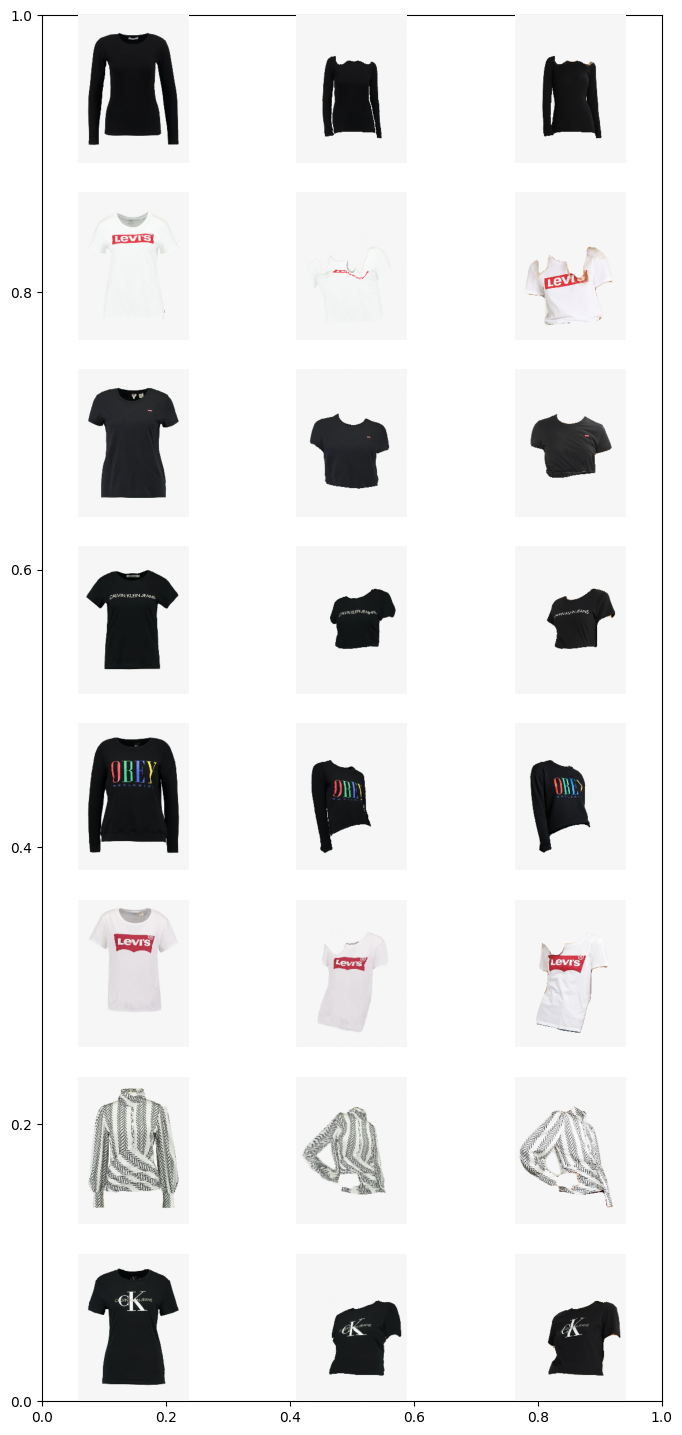

In [ ]:
train_preds = warp_model(train_inputs)

plt.subplots(figsize=(8,18))
for i in range(0, 24, 3) :
    plt.subplot(8, 3, i+1)
    plt.imshow(train_mock_up[(i//3), :, :, :])
    plt.axis(False)

    plt.subplot(8, 3, i+2)
    plt.imshow(np.clip(train_preds[-1][(i//3), :, :, :], 0, 1))
    plt.axis(False)

    plt.subplot(8, 3, i+3)
    plt.imshow(train_sample[1][0][(i//3), :, :, :])
    plt.axis(False)

plt.show()

### Validation Set

In [ ]:
val_sample = val_datasets.take(1).as_numpy_iterator().next()
val_inputs = val_sample[0]
val_ground_truths = val_sample[1][0]
val_mock_up = val_sample[0][2]

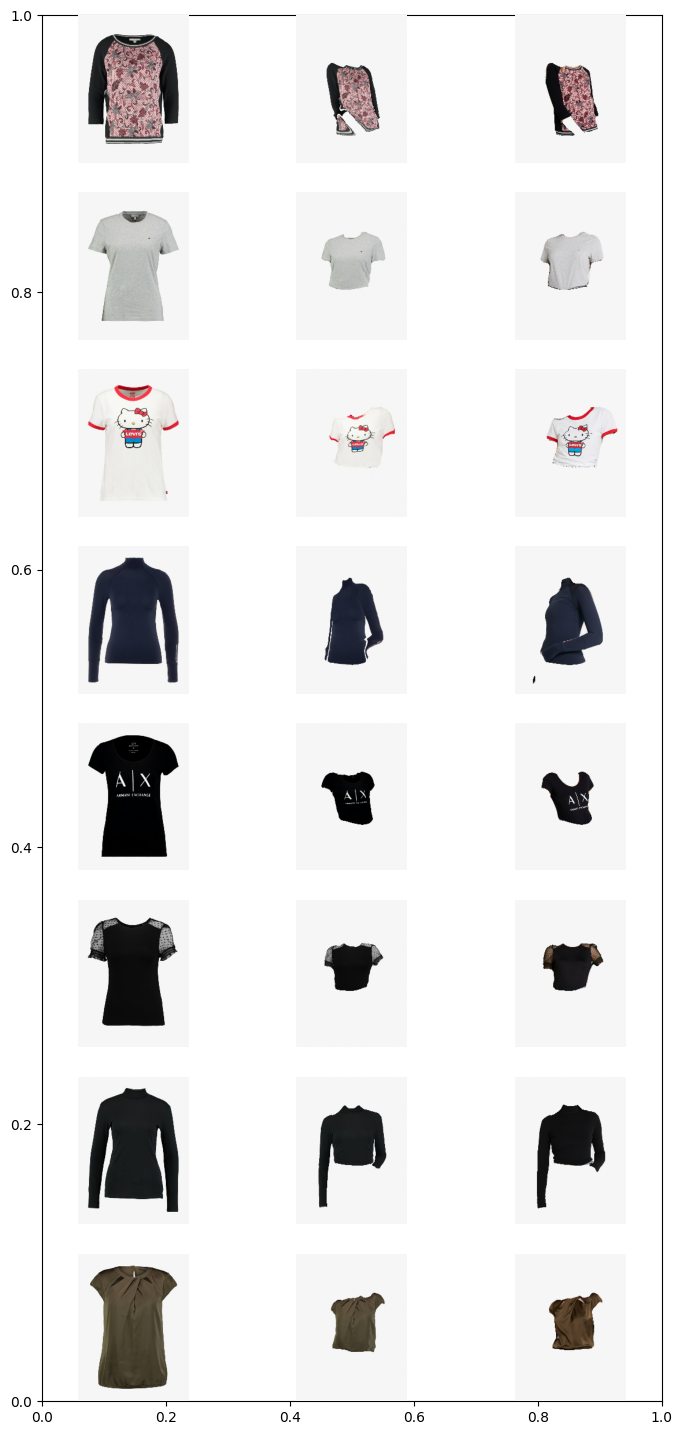

In [ ]:
val_preds = warp_model(val_inputs)

plt.subplots(figsize=(8,18))
for i in range(0, 24, 3) :
    plt.subplot(8, 3, i+1)
    plt.imshow(val_mock_up[(i//3), :, :, :])
    plt.axis(False)

    plt.subplot(8, 3, i+2)
    plt.imshow(np.clip(val_preds[-1][(i//3), :, :, :], 0, 1))
    plt.axis(False)

    plt.subplot(8, 3, i+3)
    plt.imshow(val_ground_truths[(i//3), :, :, :])
    plt.axis(False)

plt.show()

### Test Set

In [ ]:
test_sample = test_datasets.take(1).as_numpy_iterator().next()
test_inputs = test_sample[0]
test_ground_truths = test_sample[1][0]
test_mock_up = test_sample[0][2]

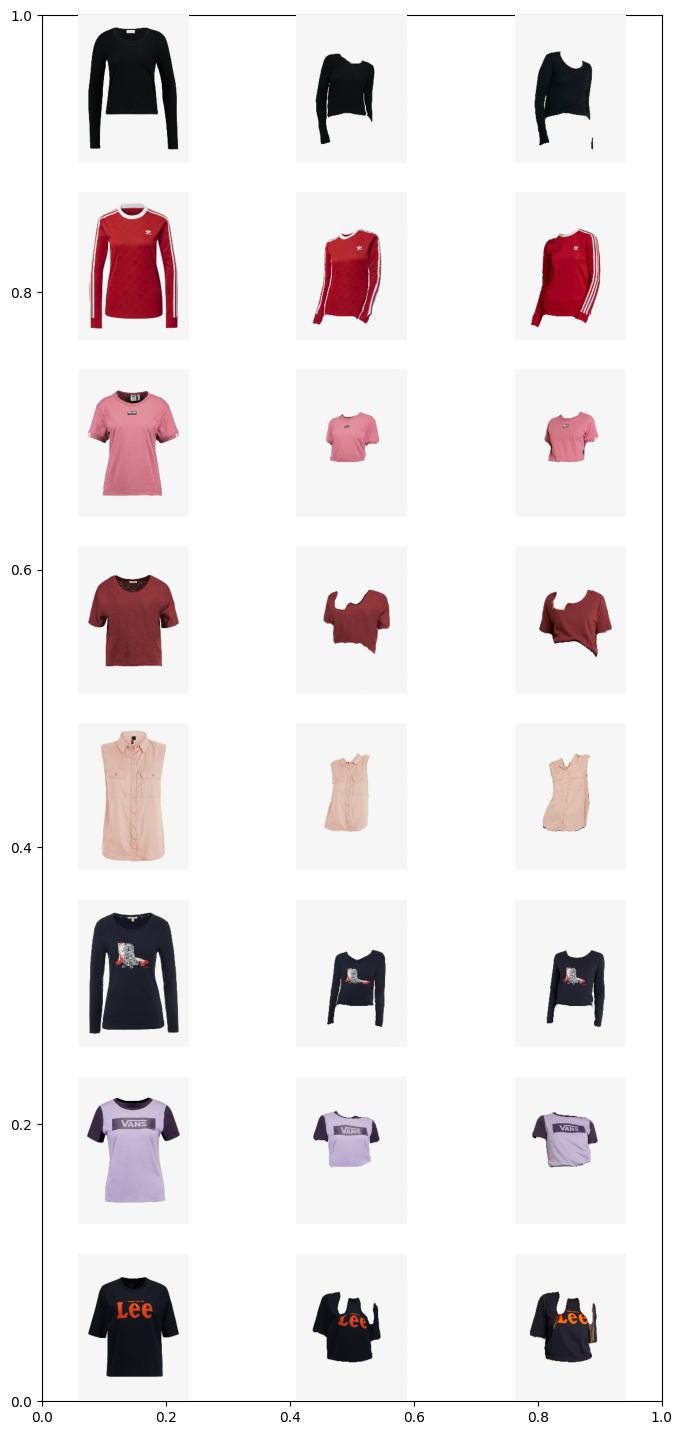

In [ ]:
test_preds = warp_model(test_inputs)

plt.subplots(figsize=(8,18))
for i in range(0, 24, 3) :
    plt.subplot(8, 3, i+1)
    plt.imshow(test_mock_up[(i//3), :, :, :])
    plt.axis(False)

    plt.subplot(8, 3, i+2)
    plt.imshow(np.clip(test_preds[-1][(i//3), :, :, :], 0, 1))
    plt.axis(False)

    plt.subplot(8, 3, i+3)
    plt.imshow(test_ground_truths[(i//3), :, :, :])
    plt.axis(False)

plt.show()

In [ ]:
def warp_test_step(inputs, real_images) :
    flow = warp_unet(inputs, training=False)
    _, _, warp_images = warp_model(inputs, training=False)

    test_l1_loss = compute_l1_loss(real_images, warp_images)
    test_grad_loss = compute_grad_loss(flow)
    test_vgg_loss = compute_vgg_loss(real_images, warp_images)

    test_total_loss = 0.5 * test_grad_loss + 20 * test_l1_loss + 0.1 * test_vgg_loss

    return test_total_loss, test_vgg_loss, test_l1_loss, test_grad_loss

@tf.function
def distributed_warp_test_step(inputs, real_images):
    test_losses = strategy.run(warp_test_step, args=(inputs, real_images))

    test_per_replica_total_loss, test_per_replica_vgg_loss, test_per_replica_l1_loss, test_per_replica_grad_loss = test_losses

    test_total_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, test_per_replica_total_loss, axis=None)
    test_vgg_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, test_per_replica_vgg_loss, axis=None)
    test_l1_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, test_per_replica_l1_loss, axis=None)
    test_grad_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, test_per_replica_grad_loss, axis=None)

    return test_total_loss, test_vgg_loss, test_l1_loss, test_grad_loss

In [5]:
test_total_loss, test_vgg_loss, test_l1_loss, test_grad_loss = 0, 0, 0, 0
test_num_batches = 0

for test_inputs, test_real_images in test_datasets :
    step_test_total_loss, step_test_vgg_loss, step_test_l1_loss, step_test_grad_loss = distributed_warp_test_step(test_inputs, test_real_images[0])

    test_total_loss += step_test_total_loss
    test_vgg_loss += step_test_vgg_loss
    test_l1_loss += step_test_l1_loss
    test_grad_loss += step_test_grad_loss

    test_num_batches += 1

mean_test_total_loss = test_total_loss / test_num_batches
mean_test_vgg_loss = test_vgg_loss / test_num_batches
mean_test_l1_loss = test_l1_loss / test_num_batches
mean_test_grad_loss = test_grad_loss / test_num_batches

print(f"Testing Loss : {mean_test_total_loss: .2f} \n\
Testing Perceptual Loss : {mean_test_vgg_loss: .2f} \n\
Testing MAE : {mean_test_l1_loss: .2f} \n\
Testing Grad Loss : {mean_test_grad_loss: .2f}")

Testing Loss :  2.30 
Testing Perceptual Loss :  16.46 
Testing MAE :  0.03 
Testing Grad Loss :  0.27
